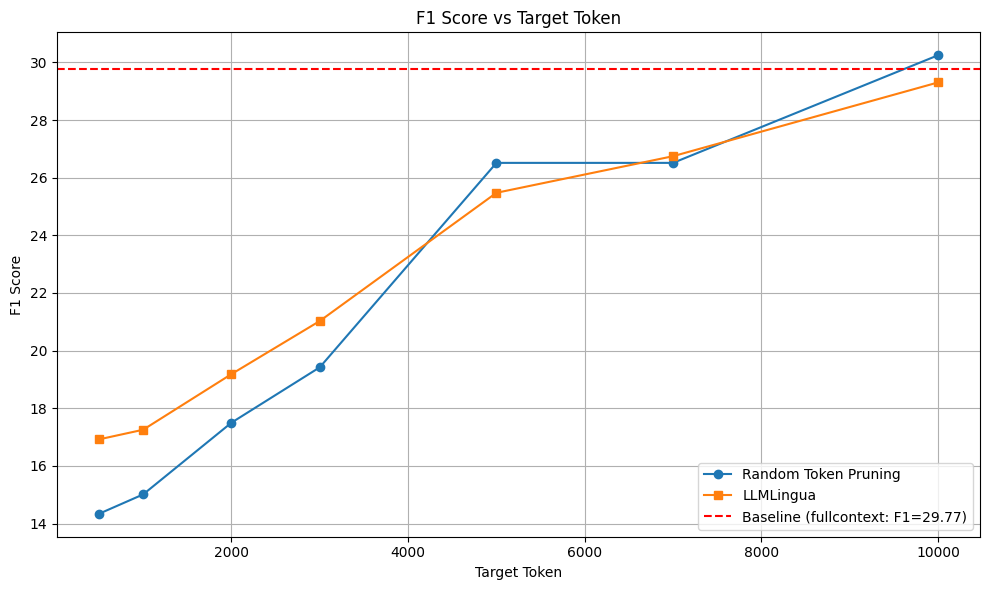

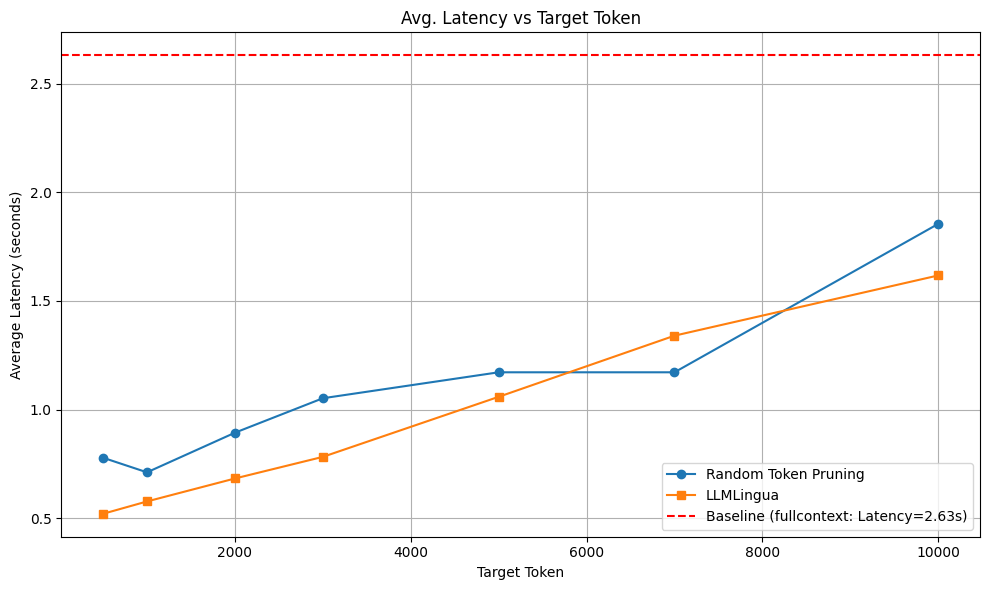

In [1]:
import matplotlib.pyplot as plt


data_random_pruning = [
    {"target_token": 10000, "f1_score": 30.2463, "avg_latency": 1.8545},
    {"target_token": 500, "f1_score": 14.3371, "avg_latency": 0.7789},
    {"target_token": 2000, "f1_score": 17.4987, "avg_latency": 0.8940},
    {"target_token": 7000, "f1_score": 26.5124, "avg_latency": 1.1719},
    {"target_token": 1000, "f1_score": 15.0096, "avg_latency": 0.7118},
    {"target_token": 5000, "f1_score": 26.5124, "avg_latency": 1.1719},
    {"target_token": 3000, "f1_score": 19.4203, "avg_latency": 1.0525},
]

data_llmlingua = [
    {"target_token": 10000, "f1_score": 29.3036, "avg_latency": 1.6173},
    {"target_token": 500, "f1_score": 16.9194, "avg_latency": 0.5211},
    {"target_token": 2000, "f1_score": 19.1843, "avg_latency": 0.6835},
    {"target_token": 7000, "f1_score": 26.7443, "avg_latency": 1.3403},
    {"target_token": 1000, "f1_score": 17.2532, "avg_latency": 0.5779},
    {"target_token": 5000, "f1_score": 25.4742, "avg_latency": 1.0591},
    {"target_token": 3000, "f1_score": 21.0263, "avg_latency": 0.7829},
]

baseline_f1_score = 29.77
baseline_avg_latency = 2.63

data_random_pruning = sorted(data_random_pruning, key=lambda x: x["target_token"])
data_llmlingua = sorted(data_llmlingua, key=lambda x: x["target_token"])
target_tokens = [entry["target_token"] for entry in data_llmlingua]
f1_scores_random_pruning = [entry["f1_score"] for entry in data_random_pruning]
avg_latencies_random_pruning = [entry["avg_latency"] for entry in data_random_pruning]
f1_scores_llmlingua = [entry["f1_score"] for entry in data_llmlingua]
avg_latencies_llmlingua = [entry["avg_latency"] for entry in data_llmlingua]


plt.figure(figsize=(10, 6))
plt.plot(target_tokens, f1_scores_random_pruning, marker='o', linestyle='-', label="Random Token Pruning")
plt.plot(target_tokens, f1_scores_llmlingua, marker='s', linestyle='-', label="LLMLingua")
plt.axhline(y=baseline_f1_score, color='r', linestyle='--', label="Baseline (fullcontext: F1=29.77)")
plt.xlabel("Target Token")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Target Token")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(target_tokens, avg_latencies_random_pruning, marker='o', linestyle='-', label="Random Token Pruning")
plt.plot(target_tokens, avg_latencies_llmlingua, marker='s', linestyle='-', label="LLMLingua")
plt.axhline(y=baseline_avg_latency, color='r', linestyle='--', label="Baseline (fullcontext: Latency=2.63s)")
plt.xlabel("Target Token")
plt.ylabel("Average Latency (seconds)")
plt.title("Avg. Latency vs Target Token")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
original_lengths = [
    1823, 13274, 9204, 14318, 8458, 11824, 9271, 3511, 2232, 16883, 10619, 10899, 16883,
    9271, 11048, 3315, 8854, 9478, 11405, 4358, 3010, 8149, 6234, 5617, 12214, 7133, 10472,
    15090, 8986, 9543, 4323, 6624, 8625, 6683, 7634, 7539, 2098, 9288, 6241, 4358, 4617, 
    2256, 6745, 12145, 9823, 10917, 7133, 8458, 3511, 5632, 3314, 16169, 10274, 5723, 
    3613, 3010, 5371, 3307, 1372, 7787, 14307, 13023, 3293, 3488, 1994, 9336, 11669, 9059,
    4358, 6018, 2256, 1777, 10229, 10038, 14307, 16653, 3511, 6870, 5370, 8149, 9435, 7959, 
    5718, 1823, 6023, 13709, 1823, 3010, 6624, 8370, 16883, 17727, 10657, 3488, 16441, 9827,
    4617, 12525, 5638, 14662, 7866, 7171, 10734, 5714, 11048, 10960, 9836, 4358, 8871, 
    10472, 9932, 3294, 9080, 7787, 10899, 11461, 14735, 10905, 10154, 3881, 3241, 7721, 
    3603, 6241, 7634, 10619, 5734, 7634, 8130, 10734, 3613, 3613, 7452, 12274, 12835, 
    12525, 9682, 11461, 6697, 8281, 5723, 3488, 12581, 3603, 1372, 10314, 3010, 9759, 
    8382, 10899
]
min_length = min(original_lengths)
max_length = max(original_lengths)
median_length = np.median(original_lengths)


average_length = sum(original_lengths) / len(original_lengths)

min_length, max_length, median_length, average_length


(1372, 17727, 8139.5, 8057.62)